# Quantitative Analysis


### Importing Packages

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import pandas as pd
from pandas import datetime, Series
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### Read Data

In [ ]:
historical_data_df = pd.read_csv('data/HistoricalData.csv')
print("Data set shape: " + str(historical_data_df.shape))
historical_data_df.head()

Data set shape: (468, 8)


,date,SP500,NASDAQ,LIBOR3M,VIX,CPI,HPI,CDS5Y
0,198001,114.16,161.75,NaN,NaN,NaN,NaN,NaN
1,198002,113.66,158.03,NaN,NaN,NaN,NaN,NaN
2,198003,102.09,131.00,NaN,NaN,79.033333,NaN,NaN
3,198004,106.29,139.99,NaN,NaN,NaN,NaN,NaN
4,198005,111.24,150.45,NaN,NaN,NaN,NaN,NaN


We can see that the file HistoricalData.csv contains historical time series of different variables with start
date of January 1980 and end date of December 2018. The US variables are two equity indices (index
level points), VIX index (index level points), CPI (index level points), Libor rate (in %), HPI (index level
points) and 5Y CDS (in %).

[VIX index](https://www.investopedia.com/terms/v/vix.asp): is a real-time market index that represents the market's expectation of 30-day forward-looking volatility. Derived from the price inputs of the S&P 500 index options, it provides a measure of market risk and investors' sentiments. It is also known by other names like "Fear Gauge" or "Fear Index." Investors, research analysts and portfolio managers look to VIX values as a way to measure market risk, fear and stress before they take investment decisions.

[CPI index](https://www.investopedia.com/articles/04/102004.asp):  The Consumer Price Index (CPI), the principal gauge of the prices of goods and services, indicates whether the economy is experiencing inflation, deflation or stagflation.

[Libor Rate](https://www.investopedia.com/terms/l/libor.asp): The London Interbank Offered Rate (LIBOR) is a benchmark interest rate at which major global banks lend to one another in the international interbank market for short-term loans.

[HPI](https://www.investopedia.com/terms/h/house-price-index-hpi.asp): The House Price Index (HPI) is a broad measure of the movement of single-family house prices in the United States. Aside from serving as an indicator of house price trends, it also functions as an analytical tool for estimating changes in the rates of mortgage defaults, prepayments, and housing affordability.

[5Y CDS](https://www.investopedia.com/how-to-invest-with-cds-4795661): A CD can generally be described as a type of federally insured savings account. Whereas traditional savings accounts enable depositors to access their money whenever they want it (albeit only six times a month), CDs generally require investors to keep their money invested for a specific period of time in exchange for predetermined monthly interest payments.

### Exploratory Data Analysis

Following some of the techniques and approches found in [this](https://github.com/advaitsave/Introduction-to-Time-Series-forecasting-Python/blob/master/Time%20Series%20in%20Python.ipynb) repo.



In [ ]:
# In case that I need I leave an untouche data frame with the data
hist_data_ = historical_data_df.copy()

Convert data into timeseries dataset

In [ ]:
def to_date(float_value):
  return datetime.strptime(str(int(float_value)), '%Y%m').date()

In [ ]:
hist_data_['date'] = hist_data_['date'].apply(lambda x : to_date(x))
hist_data_ = hist_data_.set_index('date')
hist_data_.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,SP500,NASDAQ,LIBOR3M,VIX,CPI,HPI,CDS5Y
date,,,,,,,
1980-01-01,114.16,161.75,NaN,NaN,NaN,NaN,NaN
1980-02-01,113.66,158.03,NaN,NaN,NaN,NaN,NaN
1980-03-01,102.09,131.00,NaN,NaN,79.033333,NaN,NaN
1980-04-01,106.29,139.99,NaN,NaN,NaN,NaN,NaN
1980-05-01,111.24,150.45,NaN,NaN,NaN,NaN,NaN


In [ ]:
hist_data_.describe()

,SP500,NASDAQ,LIBOR3M,VIX,CPI,HPI,CDS5Y
count,468.000000,468.000000,409.000000,348.000000,156.000000,334.000000,123.000000
mean,953.291538,1939.924502,3.919701,19.311810,169.157735,170.712629,23.037610
std,688.554387,1773.049247,2.814520,7.440128,49.828733,47.104755,12.428348
min,102.090000,131.000000,0.223350,9.510000,79.033333,100.000000,9.510000
25%,327.450000,429.425000,1.151880,13.655000,125.550000,120.992500,14.730000
50%,960.435000,1608.140000,4.000000,17.400000,166.583333,179.390000,19.650000
75%,1338.187500,2604.677500,6.000000,23.385000,215.392417,208.365000,29.176000
max,2913.980000,8109.537000,10.312500,59.890000,252.741363,265.709000,87.000000


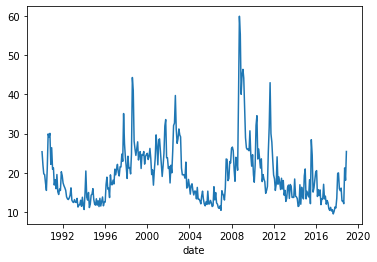

In [ ]:
value_predict = 'VIX'
hist_data_[value_predict].plot()

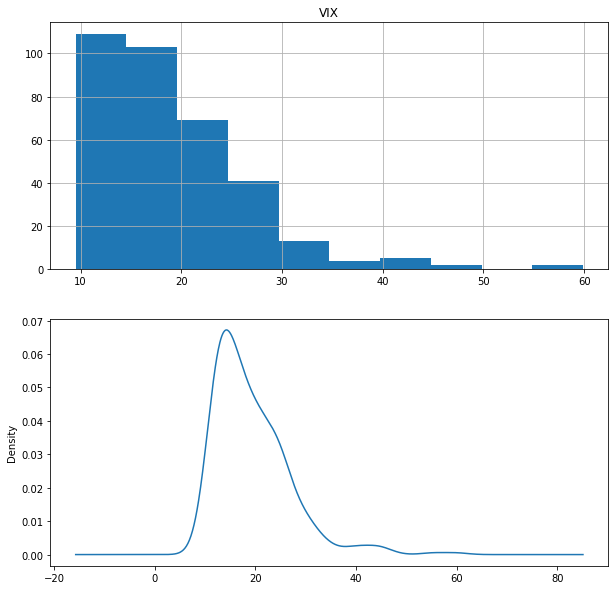

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title(value_predict)
hist_data_[value_predict].hist()
plt.subplot(2,1,2)
hist_data_[value_predict].plot(kind='kde')

plt.show()

**Stationarity**

* A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
* Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
* Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
* Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

We can test stationary using the following approches:
1. **ACF and PACF plots:** If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
2. **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
3. **Augmented Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

**Autocorrelation**

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called correlation.

If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

Because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. 


*Quick Check for Autocorrelation*

There is a quick, visual check that we can do to see if there is an autocorrelation in our time series dataset.

We can plot the observation at the previous time step $t-1$ with the observation at the next time step $t+1$ as a scatter plot.



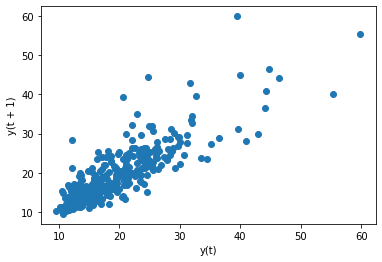

In [ ]:
from pandas.plotting import lag_plot
lag_plot(hist_data_[value_predict])
plt.show()

*Autocorrelation Plots*

We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.


In [ ]:
from pandas.plotting import autocorrelation_plot

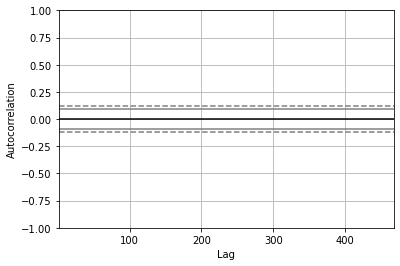

In [ ]:
autocorrelation_plot(hist_data_[value_predict])
plt.show()

*ACF and PACF plots*



Let's review the AutoCorrelation Function (ACF) and the Partial AutoCorrelation Function (PACF) plots. If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points




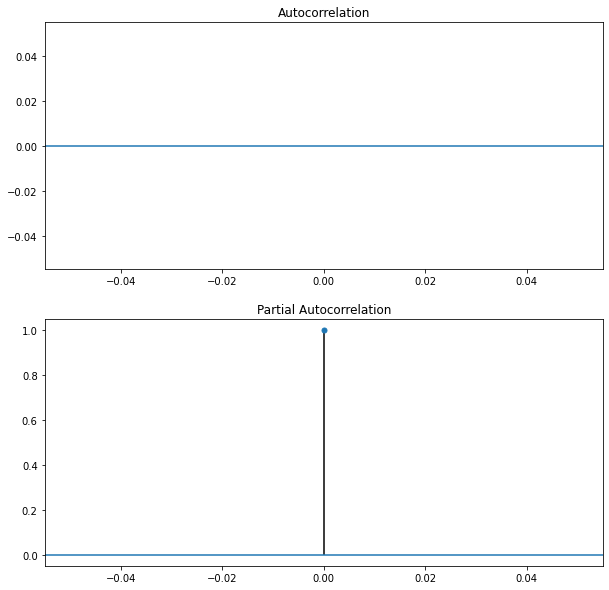

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plot_acf(hist_data_[value_predict], ax=plt.gca(), lags=31)
plt.subplot(2,1,2)
plot_pacf(hist_data_[value_predict], ax=plt.gca(), lags=31)
plt.show()

*Plotting Rolling Statistics:* we can see that the rolling mean and std are not constant with respect of time. Hence the time series is not stationary

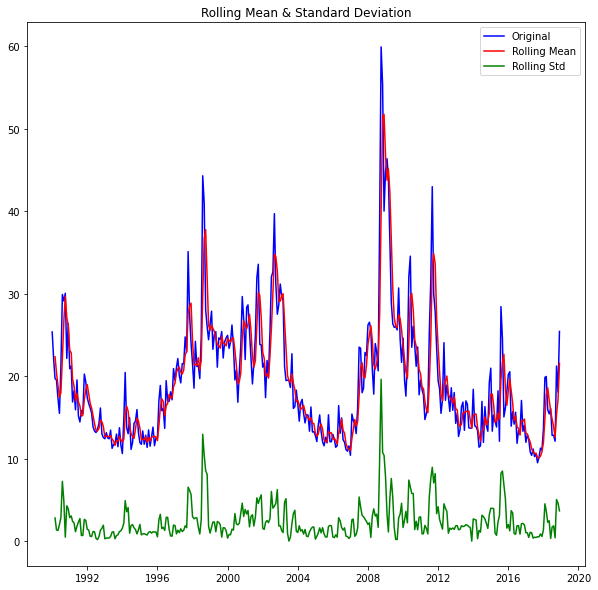

In [ ]:
k = 3
rolmean = hist_data_[value_predict].rolling(k).mean()
rolstd = hist_data_[value_predict].rolling(k).std()

plt.figure(figsize=(10,10))
orig = plt.plot(hist_data_[value_predict], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label="Rolling Std")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
def test_stationarity(timeseries, k=12):
    #Determing rolling statistics
    rolmean = timeseries.rolling(k).mean()
    rolstd = timeseries.rolling(k).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

### Time Series Forecasting

#### Multivariate  Long Short-Term Memory (LSTM)
The LSTM network, is a recurrent neural network that is trained using Backpropagation Throug time and overcomes the vanishing gradient problem.

As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problem in machine learning.

Instead of neurons, LSTM networks have memory blocks that are connected through layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

* Forget Gate: conditionally decides what information to throw away from the block.
* Input Gate: conditionally decides which values from the input to update the memory state.
* Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

In [ ]:
# Check which variables are correlated with VIX and which are correlated with each other
random_state = np.random.RandomState(0)
corr = hist_data_.corr()
corr.style.background_gradient(cmap='coolwarm')

,SP500,NASDAQ,LIBOR3M,VIX,CPI,HPI,CDS5Y
SP500,1.000000,0.977904,-0.651933,-0.166653,0.919149,0.841572,-0.706834
NASDAQ,0.977904,1.000000,-0.595061,-0.186578,0.856020,0.771001,-0.680078
LIBOR3M,-0.651933,-0.595061,1.000000,0.010810,-0.837270,-0.569874,-0.094637
VIX,-0.166653,-0.186578,0.010810,1.000000,-0.029231,-0.073045,0.657414
CPI,0.919149,0.856020,-0.837270,-0.029231,1.000000,0.922091,-0.734389
HPI,0.841572,0.771001,-0.569874,-0.073045,0.922091,1.000000,-0.550047
CDS5Y,-0.706834,-0.680078,-0.094637,0.657414,-0.734389,-0.550047,1.000000


Data cleaning
1. Remove rows where VIX has no data due to those rows holding no value on any supervised model
2. Some variables are highly correlated, for example, the SP500 and NASDAQ. But the model can handle correlations between independent variables and thus neither will be removed.
3. The CPI data brings problems due to its quarterly nature and has a very low correlation with the VIX and will be removed
4. Replace all NaN values with 0
5. Outliers won't be removed as they can be helpful to the type of model built

In [ ]:
# make a copy of original df for later use
hist_data_original = hist_data_.copy(deep=True)
hist_data_original.fillna(value=0, inplace=True)

hist_data_.drop(labels=['CPI'], axis=1, inplace=True) # drop the CPI column
hist_data_.dropna(subset=[value_predict], inplace=True) # drop NaN's 
hist_data_.fillna(value=0, inplace=True) # replace NaN with 0 

**Data transformation**
Given that the VIX measures volatility, we need to transform the data to calculate the change from period to period in each variable. The model won´t have good predictions on static data.

In [ ]:
for column in hist_data_.columns:
    if column != value_predict:
      for i in range(120, len(hist_data_)):       
        if hist_data_[column][i-1] != 0:
          hist_data_[column][i] = (hist_data_[column][i] - hist_data_[column][i-1])/ (hist_data_[column][i-1])  

In [ ]:
hist_data_.shape

(348, 6)

In [ ]:
# convert time series to supervised learning
def series_to_supervised(data_frame, n_in=1, n_out=1, dropnan=True):
  # how many features?
  n_vars = len(hist_data_.head().columns)
  cols = list()
  names = list()

  # input sequence (t-n...t-1)
  for i in range(n_in, 0, -1):
    cols.append(data_frame.shift(i))
    names += [('%s(t-%d)' % (column_name, i)) for column_name in data_frame.columns]
  
  for i in range(0, n_out):
    cols.append(data_frame.shift(-i))
    if i == 0:
      names += [('%s(t)' % (column_name)) for column_name in data_frame.columns]
    else:
      names += [('%s(t-%d)' % (column_name, i)) for column_name in data_frame.columns]
  
  # put all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names

  if dropnan:
    agg.dropna(inplace=True)
  return agg


In [ ]:
hist_data_supervised = series_to_supervised(hist_data_, n_in=2, n_out=1, dropnan=False)
hist_data_supervised.fillna(value=0, inplace=True) # replace NaN with 0 
hist_data_supervised.head()

,SP500(t-2),NASDAQ(t-2),LIBOR3M(t-2),VIX(t-2),HPI(t-2),CDS5Y(t-2),SP500(t-1),NASDAQ(t-1),LIBOR3M(t-1),VIX(t-1),HPI(t-1),CDS5Y(t-1),SP500(t),NASDAQ(t),LIBOR3M(t),VIX(t),HPI(t),CDS5Y(t)
date,,,,,,,,,,,,,,,,,,
1990-01-01,0.00,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.0000,0.00,0.0,0.0,329.08,415.81,8.3750,25.36,0.0,0.0
1990-02-01,0.00,0.00,0.000,0.00,0.0,0.0,329.08,415.81,8.3750,25.36,0.0,0.0,331.89,425.83,8.3750,21.99,0.0,0.0
1990-03-01,329.08,415.81,8.375,25.36,0.0,0.0,331.89,425.83,8.3750,21.99,0.0,0.0,339.94,435.54,8.5000,19.73,0.0,0.0
1990-04-01,331.89,425.83,8.375,21.99,0.0,0.0,339.94,435.54,8.5000,19.73,0.0,0.0,330.80,420.07,8.6875,19.52,0.0,0.0
1990-05-01,339.94,435.54,8.500,19.73,0.0,0.0,330.80,420.07,8.6875,19.52,0.0,0.0,361.23,458.97,8.3750,17.37,0.0,0.0


In [ ]:
# drop columns we don't want to predict
column_to_drop = []
for column in hist_data_supervised.columns:
  if column[-3:] == '(t)' and value_predict not in column: #Only works if n_out = 1
    column_to_drop.append(column)
    
hist_data_supervised.drop(column_to_drop, axis=1, inplace=True) 
hist_data_supervised.head()

,SP500(t-2),NASDAQ(t-2),LIBOR3M(t-2),VIX(t-2),HPI(t-2),CDS5Y(t-2),SP500(t-1),NASDAQ(t-1),LIBOR3M(t-1),VIX(t-1),HPI(t-1),CDS5Y(t-1),VIX(t)
date,,,,,,,,,,,,,
1990-01-01,0.00,0.00,0.000,0.00,0.0,0.0,0.00,0.00,0.0000,0.00,0.0,0.0,25.36
1990-02-01,0.00,0.00,0.000,0.00,0.0,0.0,329.08,415.81,8.3750,25.36,0.0,0.0,21.99
1990-03-01,329.08,415.81,8.375,25.36,0.0,0.0,331.89,425.83,8.3750,21.99,0.0,0.0,19.73
1990-04-01,331.89,425.83,8.375,21.99,0.0,0.0,339.94,435.54,8.5000,19.73,0.0,0.0,19.52
1990-05-01,339.94,435.54,8.500,19.73,0.0,0.0,330.80,420.07,8.6875,19.52,0.0,0.0,17.37


In [ ]:
random_state = np.random.RandomState(0)
corr = hist_data_supervised.corr()
corr.style.background_gradient(cmap='coolwarm')

,SP500(t-2),NASDAQ(t-2),LIBOR3M(t-2),VIX(t-2),HPI(t-2),CDS5Y(t-2),SP500(t-1),NASDAQ(t-1),LIBOR3M(t-1),VIX(t-1),HPI(t-1),CDS5Y(t-1),VIX(t)
SP500(t-2),1.000000,0.984609,-0.924007,-0.012684,-0.951782,0.012849,0.075079,0.028190,0.028824,-0.015911,0.007815,0.012844,-0.028254
NASDAQ(t-2),0.984609,1.000000,-0.975687,-0.023536,-0.990487,-0.000780,0.027720,0.008985,0.013518,-0.027940,0.005321,-0.000841,-0.041776
LIBOR3M(t-2),-0.924007,-0.975687,1.000000,0.026158,0.994760,0.017260,0.027169,0.011670,0.011387,0.030484,0.000231,0.016853,0.044896
VIX(t-2),-0.012684,-0.023536,0.026158,1.000000,0.026033,-0.096548,-0.026130,-0.035600,0.035045,0.833441,0.037066,-0.068236,0.687900
HPI(t-2),-0.951782,-0.990487,0.994760,0.026033,1.000000,0.010825,0.007838,0.005373,-0.001849,0.031400,-0.002829,0.010876,0.046436
CDS5Y(t-2),0.012849,-0.000780,0.017260,-0.096548,0.010825,1.000000,0.012909,-0.000803,0.017098,-0.065148,0.010823,0.018272,-0.020133
SP500(t-1),0.075079,0.027720,0.027169,-0.026130,0.007838,0.012909,1.000000,0.984601,-0.923932,-0.013308,-0.951757,0.012902,-0.016880
NASDAQ(t-1),0.028190,0.008985,0.011670,-0.035600,0.005373,-0.000803,0.984601,1.000000,-0.975656,-0.023658,-0.990482,-0.000785,-0.028078
LIBOR3M(t-1),0.028824,0.013518,0.011387,0.035045,-0.001849,0.017098,-0.923932,-0.975656,1.000000,0.025894,0.994751,0.017325,0.029765
VIX(t-1),-0.015911,-0.027940,0.030484,0.833441,0.031400,-0.065148,-0.013308,-0.023658,0.025894,1.000000,0.025775,-0.096479,0.829049


In [ ]:
hist_data_supervised.shape

(348, 13)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(hist_data_supervised)
scaled.shape

(348, 13)

In [ ]:
from sklearn.model_selection import train_test_split
# First, we must split the prepared dataset into train and test sets
scaled = pd.DataFrame(scaled)
values = scaled.values

x = values[:, :-1]
y = values[:, -1]

# split into input and outputs
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)

# the inputs (X) are reshaped into the 3D format expected by LSTMs, namely [samples, timesteps, features].
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Training: X - " + str(train_X.shape) + " y - " +  str(train_y.shape))
print("Testing: X - " + str(test_X.shape) + " y - " + str(test_y.shape))

Training: X - (313, 1, 12) y - (313,)
Testing: X - (35, 1, 12) y - (35,)


We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

Remember that the internal state of the LSTM in Keras is reset at the end of each batch.

Finally, we keep track of both the training and test loss during training by setting the validation_data argument in the fit() function. At the end of the run both the training and test loss are plotted.

In [ ]:
import os
folder_name = 'projects'
if not os.path.isdir(folder_name):
  os.makedirs(folder_name)

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 50)             12600     
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                9720      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 22,351
Trainable params: 22,351
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_mean_squared_error available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


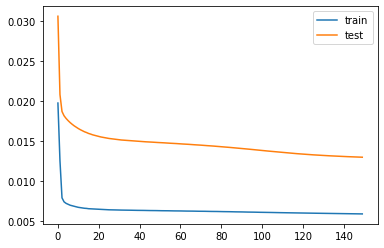

In [ ]:
# design network
model = Sequential([
                    LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
                    LSTM(30, return_sequences=False), 
                    Dense(1)
])


checkpoint = ModelCheckpoint('./projects/weights.hdf5', monitor='val_mean_squared_error', verbose=0, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

print(model.summary())
# fit network

history = model.fit(train_X, train_y, epochs=150, batch_size=1, verbose=0,shuffle=False, validation_data=(test_X, test_y), callbacks=[checkpoint, early_stopping])

model.save_weights('./projects/final weights')
model.save('./projects/my_model.h5')

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

##### Evaluate Model


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# get the predicted values and real values
predictions = model.predict(test_X)
predictions = [score[0] for score in predictions]
actual_outputs = test_y


# measure
r2 = r2_score(test_y, predictions)
mean_abs_error = mean_absolute_error(test_y, predictions)
mean_squared_e = mean_squared_error(test_y, predictions)

print('Mean Absolute Error: ' + str(mean_abs_error))
print('Mean Squared Error: ' + str(mean_squared_e))
print('R^2: ' + str(r2))

Mean Absolute Error: 0.07526250130385
Mean Squared Error: 0.012954613145476303
R^2: 0.6385271448721075
